In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from scipy import stats
import matplotlib.pyplot as plt

In [2]:
# Loading train and test data

train = pd.read_csv("../Dataset/train_1.csv").drop("Unnamed: 0",1) 
test = pd.read_csv("../Dataset/test_1.csv").drop("Unnamed: 0",1) 

train.describe()

,var15,ind_var5,ind_var30,num_var4,num_var30,num_var42,var36,num_meses_var5_ult3,PCA0,PCA1,PCA2,PCA3,Zeros,TARGET
count,6016.000000,6016.000000,6016.000000,6016.000000,6016.000000,6016.000000,6016.000000,6016.000000,6016.000000,6016.000000,6016.000000,6016.000000,6016.000000,6016.000000
mean,0.315052,0.517453,0.581117,0.131008,0.207613,0.195035,0.523491,0.510749,0.020398,0.472170,0.480837,0.198219,0.369467,0.500000
std,0.133633,0.499737,0.493417,0.141096,0.189754,0.177855,0.489437,0.463376,0.028627,0.016495,0.024470,0.018077,0.410439,0.500042
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.197917,0.000000,0.000000,0.000000,0.000000,0.000000,0.020202,0.000000,0.009450,0.469694,0.482961,0.197626,0.000000,0.000000
50%,0.281250,1.000000,1.000000,0.142857,0.333333,0.333333,1.000000,0.666667,0.016741,0.472885,0.482980,0.197750,0.000000,0.500000
75%,0.395833,1.000000,1.000000,0.142857,0.333333,0.333333,1.000000,1.000000,0.020011,0.477054,0.482998,0.197880,0.857143,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [3]:
# Making pairplot

#sns.pairplot(train, hue="TARGET", diag_kind = 'hist')

TARGET
0    AxesSubplot(0.125,0.125;0.775x0.755)
1    AxesSubplot(0.125,0.125;0.775x0.755)
Name: var15, dtype: object

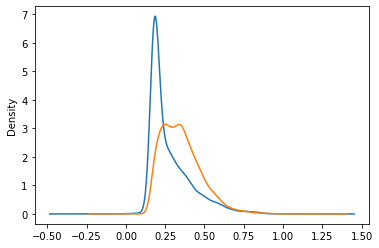

In [4]:
# Analysing var15

train.groupby("TARGET").var15.plot(kind='kde')

In [5]:
# Creating a new variable

def get_level(x):
    if x > 0 and x < 0.23:
        y = 1
    else: y = 0
    return y

train["var15_level"] = train["var15"].apply(get_level)
test["var15_level"] = test["var15"].apply(get_level)

TARGET
0    AxesSubplot(0.125,0.125;0.775x0.755)
1    AxesSubplot(0.125,0.125;0.775x0.755)
Name: Zeros, dtype: object

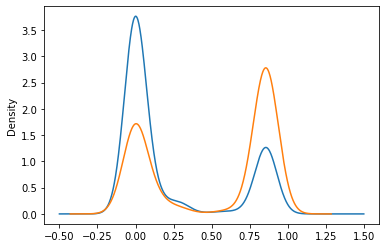

In [6]:
# Analysing Zeros

train.groupby("TARGET").Zeros.plot(kind='kde')

TARGET
0    AxesSubplot(0.125,0.125;0.775x0.755)
1    AxesSubplot(0.125,0.125;0.775x0.755)
Name: var15_level, dtype: object

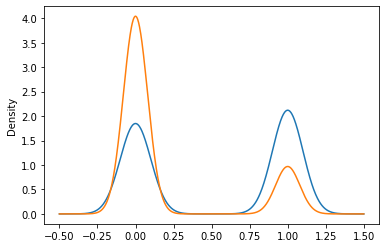

In [7]:
# Analysing PCA1


train.groupby("TARGET").var15_level.plot(kind='kde')

In [8]:
# Checking correlation of remaining variables to the target variable

abs(train.corr(method = 'pearson')["TARGET"]).sort_values()

PCA1                   0.002417
PCA3                   0.025173
PCA2                   0.068752
PCA0                   0.119813
num_var4               0.199450
var36                  0.260862
var15                  0.267819
num_var42              0.336484
ind_var5               0.337639
var15_level            0.354137
num_var30              0.354223
ind_var30              0.354429
Zeros                  0.357172
num_meses_var5_ult3    0.360426
TARGET                 1.000000
Name: TARGET, dtype: float64

In [9]:
train.corr(method = 'pearson')

,var15,ind_var5,ind_var30,num_var4,num_var30,num_var42,var36,num_meses_var5_ult3,PCA0,PCA1,PCA2,PCA3,Zeros,TARGET,var15_level
var15,1.000000,-0.147028,-0.070534,0.085093,0.009879,-0.057743,-0.015839,-0.141630,1.041623e-01,1.285171e-01,-1.152127e-01,8.156613e-02,0.090824,0.267819,-0.697867
ind_var5,-0.147028,1.000000,0.879186,0.557860,0.815882,0.856414,-0.641006,0.924975,1.701640e-02,6.217122e-03,-1.531924e-02,3.076998e-02,-0.926916,-0.337639,0.191036
ind_var30,-0.070534,0.879186,1.000000,0.759719,0.928996,0.931102,-0.764594,0.884989,7.637550e-02,6.279685e-02,-7.478157e-02,2.599643e-02,-0.988341,-0.354429,0.114099
num_var4,0.085093,0.557860,0.759719,1.000000,0.775243,0.752080,-0.680704,0.610227,8.853553e-02,8.808984e-02,-7.641668e-02,4.562981e-02,-0.734830,-0.199450,-0.105104
num_var30,0.009879,0.815882,0.928996,0.775243,1.000000,0.937392,-0.737957,0.825147,1.772767e-01,1.372180e-01,-1.758511e-01,9.414055e-02,-0.918885,-0.354223,0.051353
num_var42,-0.057743,0.856414,0.931102,0.752080,0.937392,1.000000,-0.718442,0.845793,9.883787e-02,8.655647e-02,3.869127e-02,3.648730e-02,-0.938273,-0.336484,0.101154
var36,-0.015839,-0.641006,-0.764594,-0.680704,-0.737957,-0.718442,1.000000,-0.700699,-9.143427e-02,-7.740190e-02,8.952414e-02,-3.152606e-02,0.760923,0.260862,-0.001065
num_meses_var5_ult3,-0.141630,0.924975,0.884989,0.610227,0.825147,0.845793,-0.700699,1.000000,5.303845e-02,3.931564e-02,-3.933127e-02,2.579313e-02,-0.928888,-0.360426,0.193108
PCA0,0.104162,0.017016,0.076376,0.088536,0.177277,0.098838,-0.091434,0.053038,1.000000e+00,3.841506e-15,-8.590341e-18,1.102369e-17,-0.061632,-0.119813,-0.028666
PCA1,0.128517,0.006217,0.062797,0.088090,0.137218,0.086556,-0.077402,0.039316,3.841506e-15,1.000000e+00,1.667369e-16,2.289926e-19,-0.051605,-0.002417,-0.098723


In [10]:
# Saving data

train.to_csv("../Dataset/train_2.csv")
test.to_csv("../Dataset/test_2.csv")